In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('Pressure.csv')
df.head()

,time (s),temperature (C),Pressure(V)
0,2.56,5.90,8.37
1,3.06,6.15,8.37
2,3.56,6.40,8.37
3,4.08,6.40,8.38
4,4.58,6.40,8.38


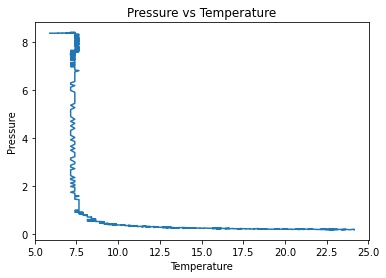

In [3]:
#plot all the data
var = 450
plt.plot(df['temperature (C)'], df['Pressure(V)'])
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Pressure vs Temperature')
plt.show()

In [4]:
#get the first 400 values to its own dataframs
df1 = df.iloc[:var, :]
df1.head()

,time (s),temperature (C),Pressure(V)
0,2.56,5.90,8.37
1,3.06,6.15,8.37
2,3.56,6.40,8.37
3,4.08,6.40,8.38
4,4.58,6.40,8.38


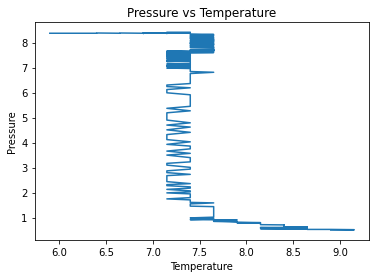

In [5]:
#plot the first 400 values
plt.plot(df1['temperature (C)'], df1['Pressure(V)'])
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Pressure vs Temperature')
plt.show()

In [6]:
#fit the data to a line
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

x = df1['temperature (C)']
y = df1['Pressure(V)']
popt, pcov = curve_fit(func, x, y)
print("slope:", popt[0])

slope: -4.548229853068215


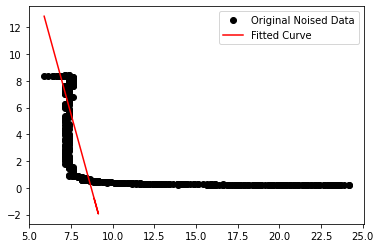

In [7]:
#plot the fitted data
plt.plot(df['temperature (C)'], df["Pressure(V)"], 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [8]:

#fit the data from 400 to the end
df2 = df.iloc[var:, :]
df2.head()

,time (s),temperature (C),Pressure(V)
450,228.40,9.15,0.51
451,228.90,9.15,0.50
452,229.40,9.15,0.50
453,229.90,8.90,0.51
454,230.41,8.90,0.49


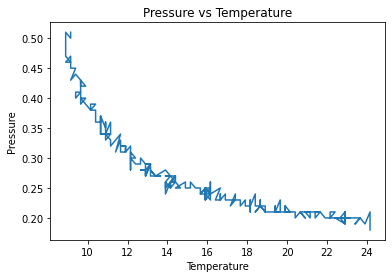

In [9]:
#plot the data from 400 to the end
plt.plot(df2['temperature (C)'], df2['Pressure(V)'])
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Pressure vs Temperature')
plt.show()

In [10]:
#fit the data to a line
from scipy.optimize import curve_fit
def func(x, a, b):
    return a * x + b

In [11]:
x = df2['temperature (C)']
y = df2['Pressure(V)']
popt2, pcov2 = curve_fit(func, x, y)
print("slope:", popt[0])

slope: -4.548229853068215


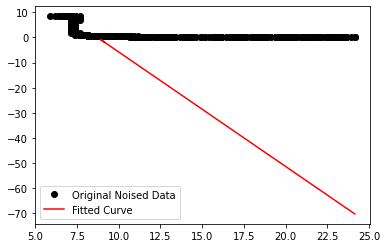

In [30]:
#plot the fitted data
plt.plot(df['temperature (C)'], df["Pressure(V)"], 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt2), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

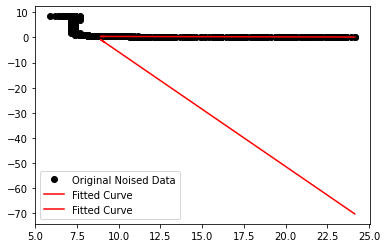

In [35]:
#plot everything together and scale correctly with a truncated fit for part one
plt.plot(df['temperature (C)'], df["Pressure(V)"], 'ko', label="Original Noised Data")
plt.plot(x, func(x, *popt2), 'r-', label="Fitted Curve")
plt.plot(x, func(x, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

In [14]:
#calculate the average slope
average_slope = (popt[0] + popt2[0])/2
print("average slope:", average_slope)

average slope: -2.2818462303699074


In [15]:
#calculate intersection of both lines
intersection = (popt[1] - popt2[1])/(popt2[0] - popt[0])
print("intersection:", intersection)

intersection: 8.636317333244598


In [16]:
#make a table with all the slopes
slopes = [popt[0], popt2[0]]
df3 = pd.DataFrame(slopes, columns = ['Slopes'])
df3.head()

,Slopes
0,-4.548230
1,-0.015463


In [17]:
#add intercepts to the table
intercepts = [popt[1], popt2[1]]
df3['Intercepts'] = intercepts
df3.head()

,Slopes,Intercepts
0,-4.548230,39.665422
1,-0.015463,0.519006


In [18]:
#add the uncertainties of each line to the table
uncertainties = [pcov[0][0], pcov2[0][0]]
df3['Uncertainties'] = uncertainties
df3.head()

,Slopes,Intercepts,Uncertainties
0,-4.548230,39.665422,6.893866e-02
1,-0.015463,0.519006,2.074012e-07


In [19]:
#add uncertainties of each intercept to the table
uncertainties_intercept = [pcov[1][1], pcov2[1][1]]
df3['Uncertainties of intercept'] = uncertainties_intercept
df3.head()

,Slopes,Intercepts,Uncertainties,Uncertainties of intercept
0,-4.548230,39.665422,6.893866e-02,3.811821
1,-0.015463,0.519006,2.074012e-07,0.000056


In [20]:
# make 0 and 1 indexes to vertical and horizontal
df3.index = ['Vertical', 'Horizontal']
df3.head()

,Slopes,Intercepts,Uncertainties,Uncertainties of intercept
Vertical,-4.548230,39.665422,6.893866e-02,3.811821
Horizontal,-0.015463,0.519006,2.074012e-07,0.000056


In [21]:
df3.to_csv('PvT_analysis.csv')